In [466]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [250]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [641]:
df17 = pd.read_csv('test2017.csv', sep=',', index_col=0)
df18 = pd.read_csv('test2018.csv', sep=',', index_col=0)
df19 = pd.read_csv('test2019.csv', sep=',', index_col=0)
df20 = pd.read_csv('test2020.csv', sep=',', index_col=0)
df21 = pd.read_csv('test2021.csv', sep=',', index_col=0)

In [597]:
df_total = pd.concat([df17,df18,df19,df20,df21])

In [642]:
df21.reset_index(inplace=True, drop=True)

In [643]:
df21['기준일ID'] = pd.to_datetime(df21['기준일ID'], format='%Y%m%d')

In [644]:

df21['year'] = df21['기준일ID'].dt.year
df21['month'] = df21['기준일ID'].dt.month
df21['day'] = df21['기준일ID'].dt.day

In [645]:
df21 = df21[['year','month','day','시간대구분','총생활인구수']]
df21.rename(columns={'시간대구분':'hour'},inplace=True)

In [646]:
for n in range(len(df21)):
    df21['year'].iloc[n]=datetime(df21['year'].iloc[n],df21['month'].iloc[n],df21['day'].iloc[n],df21['hour'].iloc[n],0,0)

In [647]:
df21

,year,month,day,hour,총생활인구수
0,2021-01-01 00:00:00,1,1,0,38538.5993
1,2021-01-01 01:00:00,1,1,1,38457.1528
2,2021-01-01 02:00:00,1,1,2,38185.1451
3,2021-01-01 03:00:00,1,1,3,38074.2836
4,2021-01-01 04:00:00,1,1,4,38229.0027
...,...,...,...,...,...
8755,2021-12-31 19:00:00,12,31,19,33304.5400
8756,2021-12-31 20:00:00,12,31,20,33368.7201
8757,2021-12-31 21:00:00,12,31,21,34083.1721
8758,2021-12-31 22:00:00,12,31,22,34380.0806


In [648]:
df21 = df21[['year','총생활인구수']]

In [649]:
df21=df21.set_index('year')

In [650]:
y=df21['총생활인구수'].resample('1H').mean()

In [651]:
y

year
2021-01-01 00:00:00    38538.5993
2021-01-01 01:00:00    38457.1528
2021-01-01 02:00:00    38185.1451
2021-01-01 03:00:00    38074.2836
2021-01-01 04:00:00    38229.0027
                          ...    
2021-12-31 19:00:00    33304.5400
2021-12-31 20:00:00    33368.7201
2021-12-31 21:00:00    34083.1721
2021-12-31 22:00:00    34380.0806
2021-12-31 23:00:00    37074.2785
Freq: H, Name: 총생활인구수, Length: 8760, dtype: float64

In [652]:
y.isnull().sum()

0

In [616]:
y1=y.fillna(method='ffill')

In [610]:
from pylab import rcParams
rcParams['figure.figsize']=15,10

In [611]:
import statsmodels.tsa.api as tsa

In [653]:
a1=tsa.seasonal_decompose(y,model='additive')

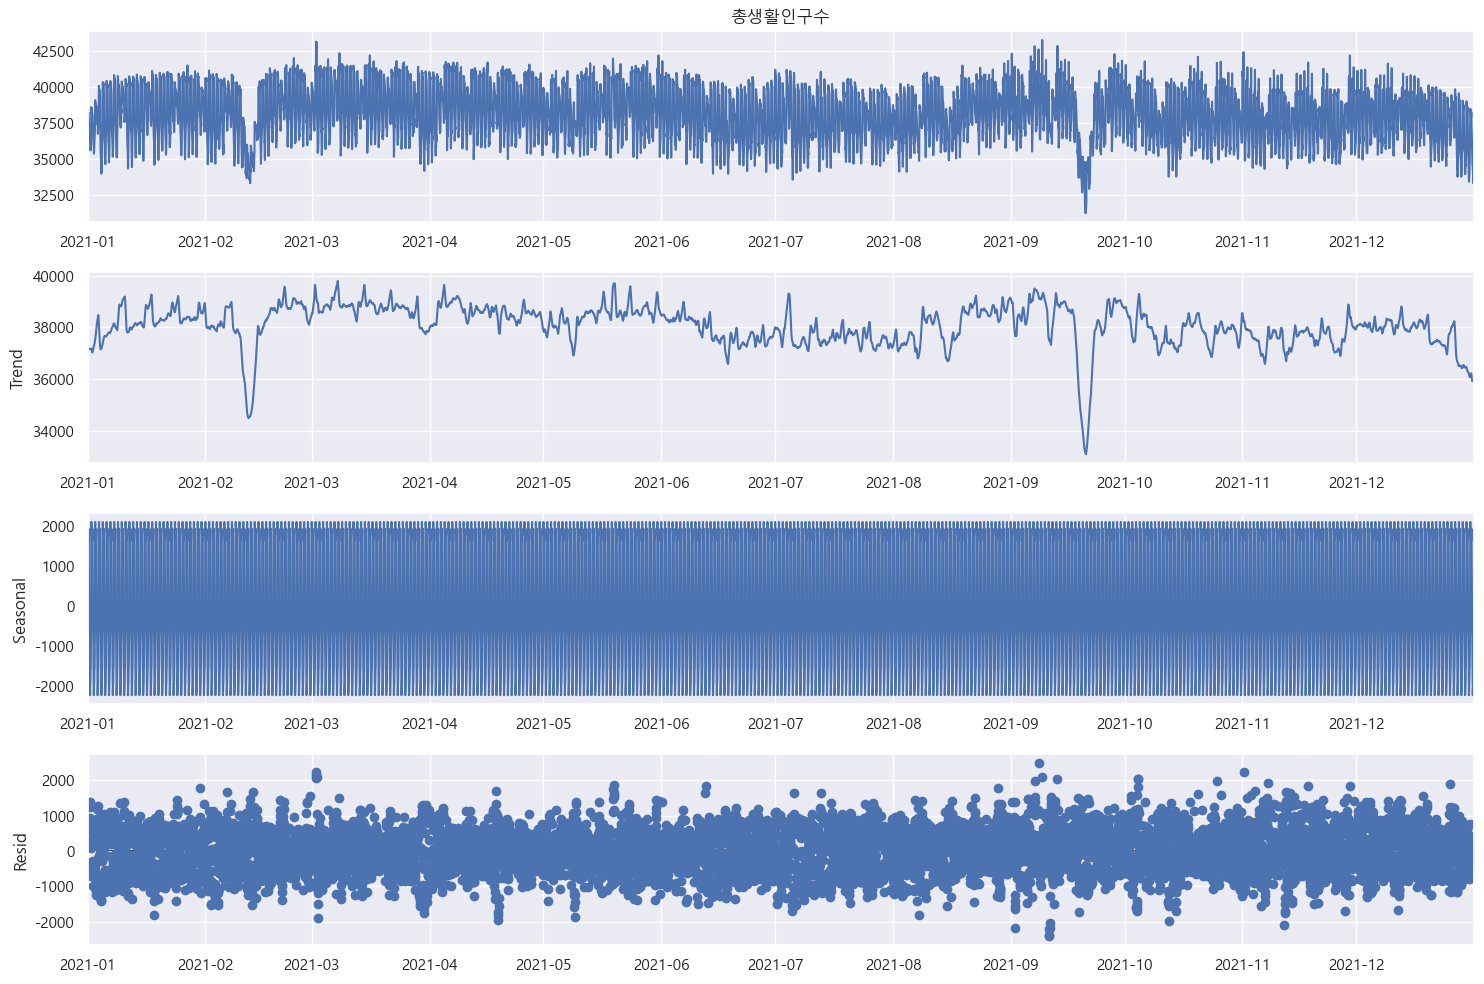

In [654]:
fig=a1.plot()
plt.show()

In [655]:
import itertools

In [656]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [657]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [658]:
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [659]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [660]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

In [661]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [662]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
47,"(1, 0, 1)","(1, 1, 1, 12)",130817.502089
39,"(1, 0, 0)","(1, 1, 1, 12)",130843.929859
46,"(1, 0, 1)","(1, 1, 0, 12)",130893.196213
38,"(1, 0, 0)","(1, 1, 0, 12)",130898.206251
31,"(0, 1, 1)","(1, 1, 1, 12)",131225.253826
...,...,...,...
12,"(0, 0, 1)","(1, 0, 0, 12)",200659.697813
9,"(0, 0, 1)","(0, 0, 1, 12)",201403.534651
8,"(0, 0, 1)","(0, 0, 0, 12)",203144.207919
1,"(0, 0, 0)","(0, 0, 1, 12)",203684.511475


In [665]:
mod = tsa.statespace.SARIMAX(y,order=(1, 0, 1),seasonal_order=(1, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             총생활인구수   No. Observations:                 8760
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood              -65403.751
Date:                            Sun, 04 Dec 2022   AIC                         130817.502
Time:                                    03:26:46   BIC                         130852.877
Sample:                                01-01-2021   HQIC                        130829.557
                                     - 12-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8888      0.004    208.663      0.000       0.880       0.897
ma.L1         -0.0373      0.009   

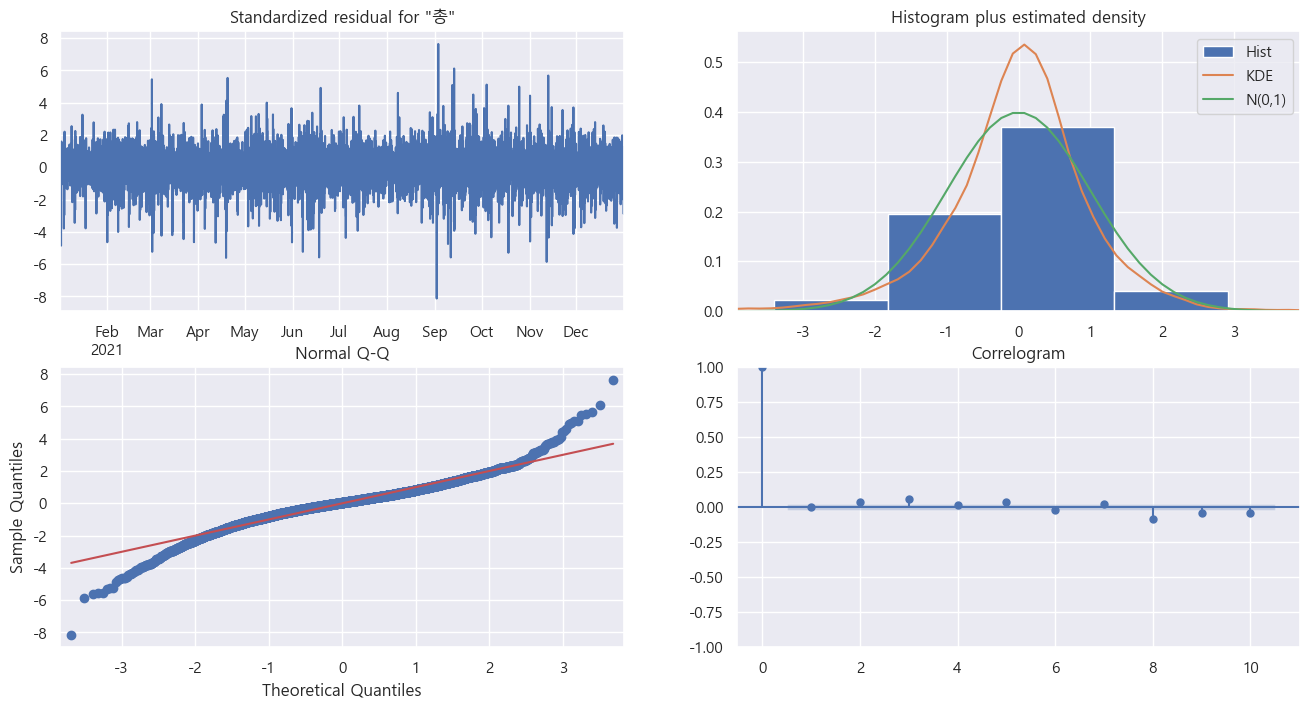

In [666]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [576]:
results.get_prediction()

In [577]:
y1.head()

year
2017-01-01 00:00:00    43922.2281
2017-01-01 01:00:00    43763.4929
2017-01-01 02:00:00    43561.5708
2017-01-01 03:00:00    43928.9929
2017-01-01 04:00:00    44150.2973
Freq: H, Name: 총생활인구수, dtype: float64

In [667]:
pred_uc = results.get_forecast(steps=1416)

In [668]:
pred=pd.DataFrame(pred_uc.predicted_mean).reset_index()

In [669]:
pred

,index,predicted_mean
0,2022-01-01 00:00:00,37199.653228
1,2022-01-01 01:00:00,36993.072806
2,2022-01-01 02:00:00,36967.432348
3,2022-01-01 03:00:00,36986.108915
4,2022-01-01 04:00:00,37175.713142
...,...,...
1411,2022-02-28 19:00:00,35240.910946
1412,2022-02-28 20:00:00,34851.393925
1413,2022-02-28 21:00:00,34989.100531
1414,2022-02-28 22:00:00,35009.189857


In [670]:
y_pred=pred['predicted_mean']

In [671]:
test_y=pd.read_csv('test01_02.csv')
test_y=np.array(test_y['총생활인구수'])
test_y=test_y.reshape(1416,1)

In [672]:

print('LinearRegression')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred))))
print("r2 : ", r2(test_y,y_pred))

LinearRegression
Mean Squared Error : 7173860.98193
Root Mean Squared Error : 2678.40643
r2 :  -1.0345687836326554


In [636]:
sample=pd.read_csv('sample_submission.csv')

In [638]:
sample['count']=y_pred

In [639]:
sample

,id,count
0,0,37287.625001
1,1,37030.071130
2,2,36892.624502
3,3,36881.710490
4,4,37048.813264
...,...,...
1411,1411,35302.824545
1412,1412,34906.032348
1413,1413,35037.228759
1414,1414,35056.590226


In [640]:
sample.to_csv('submission1.csv',index=False)